1. Importing libraries

In [2]:
"""
Encoding categorical features using OneHotEncoder to convert them into a format suitable for machine learning models.
"""
"""
This section imports all the necessary libraries and modules
required for data manipulation, visualization, machine learning
modeling, and performance evaluation.
"""

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and array manipulations
import plotly.express as plx  # For creating interactive data visualizations
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets via oversampling
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler  # For encoding and feature scaling
from tensorflow.keras.models import Sequential  # For building a sequential neural network model
from tensorflow.keras.layers import GRU, Dense  # For adding layers to the neural network model
from tensorflow.keras.metrics import MeanAbsolutePercentageError  # For evaluating model performance
import tensorflow as tf  # For deep learning tasks
import matplotlib.pyplot as plt  # For creating static plots
from google.colab import drive  # For accessing Google Drive in Colab

# 2. Mounting Google Drive to Access Dataset

In [3]:
"""
Mounting Google Drive to access the dataset stored on the drive.
"""
"""
This section mounts Google Drive to the Colab environment to
access files stored on the drive, specifically the dataset
used for analysis and model training.
"""
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Loading and Exploring the Dataset

In [4]:
"""
Loading the dataset from a CSV file into a Pandas DataFrame.
"""
"""
This section loads the dataset from Google Drive into a pandas DataFrame.
It also performs an initial exploration of the dataset by displaying
its shape, the first few rows, and detailed information about the data types.
"""
# Load dataset from Google Drive into a pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/praveena stock/prices.csv")

In [ ]:
# Display dataset dimensions
data.shape
data.head()

Dataset Shape: (851264, 7)


# 4. Analyzing Stock Symbols


In [7]:
"""
This section counts and displays the number of unique stock symbols
in the dataset. It helps in understanding the distribution of records
across different stocks.
"""

# Count unique symbols in the dataset
unique_symbols = data['symbol'].value_counts()

# Display the count of unique symbols
print("Unique Symbols Count:\n", unique_symbols)

Unique Symbols Count:
 symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64


In [8]:
# Display summary information about the dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


# 5. Filtering and Visualizing Google Stock Data

In [9]:
"""
This section filters the dataset to include only records related to
Google's stock data (symbol: GOOG). It then visualizes the trends in
opening vs. closing prices, high vs. low prices, and the volume of
stock traded over time.
"""

# Filter dataset for Google's stock data
google = data[data['symbol'] == 'GOOG']

# Display first few rows of Google's stock data
print("Google Stock Data:\n", google.head())

# Display the shape of Google's stock data
print("Google Stock Data Shape:", google.shape)



Google Stock Data:
             date symbol        open       close         low        high  \
439   2010-01-04   GOOG  626.951088  626.751061  624.241073  629.511067   
907   2010-01-05   GOOG  627.181073  623.991055  621.541045  627.841071   
1375  2010-01-06   GOOG  625.861078  608.261023  606.361042  625.861078   
1843  2010-01-07   GOOG  609.401025  594.101005  592.651008  610.001045   
2311  2010-01-08   GOOG  592.000997  602.021036  589.110988  603.251034   

          volume  
439    3927000.0  
907    6031900.0  
1375   7987100.0  
1843  12876600.0  
2311   9483900.0  
Google Stock Data Shape: (1762, 7)


In [11]:
 #Plotting open vs close prices for Google stocks
plx.line(google, x="date", y=["open", "close"],
         title="Google Stock: Open vs Close Prices")



In [12]:
# Plotting high vs low prices for Google stocks
plx.line(google, x="date", y=["high", "low"],
         title="Google Stock: High vs Low Prices")



In [13]:
# Plotting volume traded for Google stocks
plx.line(google, x="date", y=["volume"],
         title="Google Stock: Volume Traded")

# 6. Filtering and Visualizing Facebook Stock Data

In [15]:

"""
This section filters the dataset to include only records related to
Facebook's stock data (symbol: FB). It visualizes the trends in
opening vs. closing prices, high vs. low prices, and the volume of
stock traded over time.
"""

# Filter dataset for Facebook's stock data
facebook = data[data['symbol'] == 'FB']

# Plotting open vs close prices for Facebook stocks
plx.line(facebook, x="date", y=["open", "close"],
         title="Facebook Stock: Open vs Close Prices")


In [16]:
# Plotting high vs low prices for Facebook stocks
plx.line(facebook, x="date", y=["high", "low"],
         title="Facebook Stock: High vs Low Prices")

In [18]:
# Plotting volume traded for Facebook stocks
plx.line(facebook, x="date", y=["volume"],
         title="Facebook Stock: Volume Traded")

In [20]:
filtered_dataset = data[(data['symbol'] == 'GOOG') | (data['symbol'] == 'FB')]

print(filtered_dataset.head())

print("Filtered data shape:", filtered_dataset.shape)

            date symbol        open       close         low        high  \
439   2010-01-04   GOOG  626.951088  626.751061  624.241073  629.511067   
907   2010-01-05   GOOG  627.181073  623.991055  621.541045  627.841071   
1375  2010-01-06   GOOG  625.861078  608.261023  606.361042  625.861078   
1843  2010-01-07   GOOG  609.401025  594.101005  592.651008  610.001045   
2311  2010-01-08   GOOG  592.000997  602.021036  589.110988  603.251034   

          volume  
439    3927000.0  
907    6031900.0  
1375   7987100.0  
1843  12876600.0  
2311   9483900.0  
Filtered data shape: (2770, 7)



# 7. Handling Imbalanced Data with SMOTE

In [21]:
"""
Handling class imbalance in the dataset using SMOTE (Synthetic Minority Over-sampling Technique).
"""
"""
This section addresses the issue of imbalanced classes in the dataset
using SMOTE (Synthetic Minority Over-sampling Technique).
It resamples the data to create a more balanced distribution
of stock symbols.
"""

# Apply SMOTE to handle class imbalance in Facebook data
X_fb = filtered_dataset.drop(columns=['symbol', 'date'])
y_fb = filtered_dataset['symbol']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_fb_resampled, y_fb_resampled = smote.fit_resample(X_fb, y_fb)

# Creating a new DataFrame for the upsampled data
upsampled_fb = pd.DataFrame(X_fb_resampled, columns=X_fb.columns)
upsampled_fb['symbol'] = y_fb_resampled

In [22]:
# Resetting the index and adding random dates
upsampled_fb.reset_index(drop=True, inplace=True)
upsampled_fb['date'] = np.random.choice(facebook['date'], size=len(upsampled_fb), replace=True)

# Displaying the new distribution of symbols
print(upsampled_fb['symbol'].value_counts())

# Displaying the shape of the upsampled DataFrame
print("Upsampled DataFrame Shape:", upsampled_fb.shape)

symbol
GOOG    1762
FB      1762
Name: count, dtype: int64
Upsampled DataFrame Shape: (3524, 7)


# 8. Preparing Data for Google Stock Prediction

In [23]:
"""
Scaling numerical features to a standard range using MinMaxScaler.
"""
"""
This section prepares Google's stock data for prediction by:
1. Filtering the upsampled data for Google stock.
2. Sorting the data by date.
3. Scaling the closing prices using MinMaxScaler.
"""

# Filter and sort Google data from upsampled data
google = upsampled_fb[upsampled_fb["symbol"] == 'GOOG']
google = google.sort_values(by='date')
google.reset_index(drop=True, inplace=True)


In [24]:
"""
Scaling numerical features to a standard range using MinMaxScaler.
"""
# Normalize closing prices using MinMaxScaler
close_prices = google['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_normalized = scaler.fit_transform(close_prices)

# 9. Creating Datasets for Training and Testing

In [28]:
"""
Importing the necessary libraries for various tasks such as data manipulation, visualization, and modeling.
"""
"""
This section defines a function to create datasets for
training and testing. It converts the time series data into
a format suitable for model training by creating sequences
of a specified window size.
"""

def create_dataset(data, win_size):
    """
    Converts a time series into a dataset with features and target variables.

    Parameters:
    - data (numpy array): The time series data to be converted.
    - win_size (int): The window size to create input features.

    Returns:
    - X (numpy array): The input features for the model.
    - Y (numpy array): The target variables for the model.
    """
    X, Y = [], []
    for i in range(len(data) - win_size - 1):
        X.append(data[i:(i + win_size), 0])
        Y.append(data[i + win_size, 0])
    return np.array(X), np.array(Y)

# Define window size for time series
win_size = 20

# Create training and testing datasets

X, Y = create_dataset(close_prices_normalized, win_size)
X = X.reshape(X.shape[0], 1, X.shape[1])

train_size = int(len(X) * 0.8)
train_X, test_X = X[0:train_size], X[train_size:]
train_Y, test_Y = Y[0:train_size], Y[train_size:]
print(train_Y)

import pickle

# Save test_X data as google.pkl
with open('google.pkl', 'wb') as file:
    pickle.dump(test_X, file)
# Reshape input data to be compatible with GRU layer



[0.32857906 0.43301879 0.75944392 ... 0.56872853 0.46027117 0.2301875 ]



# 10. Splitting Data into Training and Testing Sets


In [29]:
"""
This section splits the prepared dataset into training and testing sets,
with 80% of the data used for training and 20% for testing.
"""

# Splitting data into training and testing sets
train_size = int(len(X) * 0.8)
train_X, test_X = X[0:train_size], X[train_size:]
train_Y, test_Y = Y[0:train_size], Y[train_size:]

# Display the shape of training and testing datasets
print("Training Data Shape:", train_X.shape)
print("Testing Data Shape:", test_X.shape)


Training Data Shape: (1392, 1, 20)
Testing Data Shape: (349, 1, 20)


# 11. Building the GRU Model

In [30]:
"""
Building the neural network model using TensorFlow's Sequential API.
"""

"""
This section builds a GRU-based sequential neural network model.
It includes three GRU layers followed by a Dense layer.
The model is compiled with the Adam optimizer and mean squared error loss.
"""

# Initialize the sequential model
model = Sequential()

# Add GRU layers to the model
model.add(GRU(units=50, return_sequences=True, input_shape=(1, win_size)))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50))

# Add a dense output layer
model.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [31]:
"""
Compiling the model by specifying the optimizer, loss function, and evaluation metric.
"""
# Define custom metrics for evaluation
def rmae(y_true, y_pred):
    """
    Computes the Root Mean Absolute Error (RMAE) between true and predicted values.

    Parameters:
    - y_true (numpy array): True target values.
    - y_pred (numpy array): Predicted target values.

    Returns:
    - (tensor): Computed RMAE value.
    """
    return tf.sqrt(tf.reduce_mean(tf.abs(y_pred - y_true)))

def rmse(y_true, y_pred):
    """
    Computes the Root Mean Squared Error (RMSE) between true and predicted values.

    Parameters:
    - y_true (numpy array): True target values.
    - y_pred (numpy array): Predicted target values.

    Returns:
    - (tensor): Computed RMSE value.
    """
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Compile the model with optimizer, loss, and metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse, rmae])

# Display the model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 1, 50)               │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,451 (161.92 KB)

 Trainable params: 41,451 (161.92 KB)

 Non-trainable params: 0 (0.00 B)



# 12. Training the GRU Model

In [32]:
"""
Training the model on the training dataset.
"""
"""
This section trains the GRU model on the training dataset
for 50 epochs with a batch size of 32. It also validates
the model performance on the testing dataset during training.
"""

# Train the model
train_model = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_data=(test_X, test_Y))

# Save the trained model to a file
model.save("google_model.h5")

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0777 - rmae: 0.4494 - rmse: 0.2681 - val_loss: 0.0365 - val_rmae: 0.3922 - val_rmse: 0.1889
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - rmae: 0.4090 - rmse: 0.2127 - val_loss: 0.0367 - val_rmae: 0.3918 - val_rmse: 0.1886
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - rmae: 0.3978 - rmse: 0.2013 - val_loss: 0.0371 - val_rmae: 0.3841 - val_rmse: 0.1886
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0422 - rmae: 0.3968 - rmse: 0.2033 - val_loss: 0.0377 - val_rmae: 0.3839 - val_rmse: 0.1893
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0443 - rmae: 0.4029 - rmse: 0.2099 - val_loss: 0.0371 - val_rmae: 0.3875 - val_rmse: 0.1881
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - rmae: 0.4005 - rmse: 0.2068 - val_loss: 0.0373 - val_rmae: 0.3870 - val_rmse: 0.1883
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - rmae: 0.4042 - rmse:


# 13. Predicting Future Stock Prices

In [33]:
"""
Scaling numerical features to a standard range using MinMaxScaler.
"""
"""
This section defines a function to predict future stock prices
based on the trained model and a specified number of days.
It uses the last available sequence in the test data to
make predictions iteratively.
"""

def predict_next_days(model, X_test_scaled, scaler, num_days):
    """
    Predicts the closing stock prices for the next 'num_days' days.

    Parameters:
    - model (Sequential): The trained GRU model.
    - X_test_scaled (numpy array): Scaled test data used as input for prediction.
    - scaler (MinMaxScaler): Scaler used to inverse transform the predicted values.
    - num_days (int): The number of days to predict ahead.

    Returns:
    - pred_price (numpy array): The predicted stock prices.
    """
    predicted = []
    input_sequence = X_test_scaled[-1].reshape(1, 1, -1)  # Start with the last sequence
    for _ in range(num_days):
        next_day_pred = model.predict(input_sequence)
        predicted.append(next_day_pred[0, 0])
        input_sequence = np.append(input_sequence[:, :, 1:], next_day_pred.reshape(1, 1, 1), axis=2)

    # Inverse transform the predicted prices to original scale
    pred_price = scaler.inverse_transform(np.array(predicted).reshape(-1, 1))
    return pred_price.flatten()

# Predict the next 3 days of Google stock prices
num_days_to_predict = 3
pred_price = predict_next_days(model, test_X, scaler, num_days_to_predict)

# Display the predicted prices
for i in range(num_days_to_predict):
    print(f"Predicted close price for day {i + 1}: ${pred_price[i]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted close price for day 1: $642.97
Predicted close price for day 2: $709.83
Predicted close price for day 3: $666.29



# 14. Evaluating Facebook Stock Data

In [34]:
"""
Scaling numerical features to a standard range using MinMaxScaler.
"""
"""
This section repeats the data preparation, model training, and
prediction steps for Facebook stock data, similar to the Google stock data.
"""

# Repeat similar steps for Facebook stock data as done for Google stock data
facebook = upsampled_fb[upsampled_fb['symbol'] == 'FB']
facebook = facebook.sort_values(by='date')
facebook.reset_index(drop=True, inplace=True)

# Extract and scale closing prices for Facebook
close_prices = facebook['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

# Create training and testing datasets
X, Y = create_dataset(normalized_close_prices, win_size)
X = X.reshape(X.shape[0], 1, X.shape[1])
train_size = int(len(X) * 0.8)
train_X, test_X = X[:train_size], X[train_size:]
train_Y, test_Y = Y[:train_size], Y[train_size:]

# Build and compile the model for Facebook
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(1, win_size)))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse, rmae])

# Train the model
train_model = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_data=(test_X, test_Y))

# Save the Facebook model to a file
model.save("fb_model.h5")

# Predict the next 3 days' closing prices for Facebook
pred_price = predict_next_days(model, test_X, scaler, num_days_to_predict)

# Display the predicted prices for Facebook
for i in range(num_days_to_predict):
    print(f"Predicted close price for Facebook on day {i + 1}: ${pred_price[i]:.2f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.1592 - rmae: 0.5670 - rmse: 0.3870 - val_loss: 0.0724 - val_rmae: 0.4684 - val_rmse: 0.2650
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0746 - rmae: 0.4750 - rmse: 0.2726 - val_loss: 0.0728 - val_rmae: 0.4703 - val_rmse: 0.2659
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0760 - rmae: 0.4800 - rmse: 0.2765 - val_loss: 0.0720 - val_rmae: 0.4675 - val_rmse: 0.2645
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0727 - rmae: 0.4729 - rmse: 0.2698 - val_loss: 0.0719 - val_rmae: 0.4675 - val_rmse: 0.2650
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0735 - rmae: 0.4729 - rmse: 0.2712 - val_loss: 0.0718 - val_rmae: 0.4687 - val_rmse: 0.2650
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0754 - rmae: 0.4777 - rmse: 0.2759 - val_loss: 0.0717 - val_rmae: 0.4690 - val_rmse: 0.2652
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0700 - rmae: 0.4678 - rmse: 0.2656 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted close price for Facebook on day 1: $76.34
Predicted close price for Facebook on day 2: $77.75
Predicted close price for Facebook on day 3: $79.87


In [35]:
"""
Scaling numerical features to a standard range using MinMaxScaler.
"""
# Filter and sort Facebook data from upsampled data
facebook = upsampled_fb[upsampled_fb['symbol'] == 'FB']
facebook = facebook.sort_values(by='date')
facebook.reset_index(drop=True, inplace=True)

# Normalize closing prices using MinMaxScaler
close_prices = facebook['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_close_prices = scaler.fit_transform(close_prices)

def make_dataset(data, win_size):
    """
    Create datasets for training a time series model.

    Parameters:
    - data (numpy.ndarray): Normalized close prices.
    - win_size (int): Size of the time window.

    Returns:
    - tuple: (X, Y) where X is the input features and Y is the target values.
    """
    X, Y = [], []
    for i in range(len(data) - win_size):
        X.append(data[i:i + win_size, 0])
        Y.append(data[i + win_size, 0])
    return np.array(X), np.array(Y)

In [36]:

# Create training and testing datasets for Facebook
win_size = 20
X, Y = make_dataset(normalized_close_prices, win_size)
X = X.reshape(X.shape[0], 1, X.shape[1])
train_size = int(len(X) * 0.80)
test_size = len(X) - train_size
train_X, test_X = X[:train_size], X[train_size:]
train_Y, test_Y = Y[:train_size], Y[train_size:]


# Save test data
with open('facebook_X_test.pkl', 'wb') as file:
    pickle.dump(test_X, file)


In [37]:
"""
Building the neural network model using TensorFlow's Sequential API.
"""
# Define and compile the GRU model for Facebook
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(1, win_size)))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50))
model.add(Dense(units=1))

def rmse(y_true, y_pred):
    """
    Compute the Root Mean Squared Error.

    Parameters:
    - y_true (Tensor): True values.
    - y_pred (Tensor): Predicted values.

    Returns:
    - Tensor: Computed RMSE.
    """
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [38]:
"""
Compiling the model by specifying the optimizer, loss function, and evaluation metric.
"""
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse, rmae])

# Train the model
trainmodel = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_data=(test_X, test_Y))

# Save the trained model
model.save("fb_model.h5")

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.1709 - rmae: 0.5724 - rmse: 0.3984 - val_loss: 0.0726 - val_rmae: 0.4672 - val_rmse: 0.2646
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0750 - rmae: 0.4801 - rmse: 0.2747 - val_loss: 0.0724 - val_rmae: 0.4684 - val_rmse: 0.2647
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0707 - rmae: 0.4675 - rmse: 0.2660 - val_loss: 0.0719 - val_rmae: 0.4674 - val_rmse: 0.2642
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0750 - rmae: 0.4761 - rmse: 0.2741 - val_loss: 0.0720 - val_rmae: 0.4683 - val_rmse: 0.2647
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0777 - rmae: 0.4817 - rmse: 0.2778 - val_loss: 0.0732 - val_rmae: 0.4691 - val_rmse: 0.2669
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0735 - rmae: 0.4757 - rmse: 0.2711 - val_loss: 0.0746 - val_rmae: 0.4754 - val_rmse: 0.2701
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0752 - rmae: 0.4785 - rmse:

# 9. Predicting Future Prices for Facebook

In [39]:
# Predict the next 3 days of Facebook stock prices
pred_price = predict_next_days(model, test_X, scaler, num_days_to_predict)

# Display the predicted prices
for i in range(num_days_to_predict):
    print(f"Predicted close price for day {i + 1}: ${pred_price[i]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted close price for day 1: $76.86
Predicted close price for day 2: $77.76
Predicted close price for day 3: $74.97


# 10. Plotting Evaluation Metrics

In [40]:
# Define evaluation metrics for Google and Facebook
Google = {
    'RMSE': 0.1954,
    'RMAE': 0.3946,
    'LOSS': 0.0396
}
Facebook = {
    'RMSE': 0.1909,
    'RMAE': 0.3804,
    'LOSS': 0.0401
}

# Plot evaluation metrics for Google and Facebook
metrics = list(Google.keys())
model1_values = list(Google.values())
model2_values = list(Facebook.values())

plt.figure(figsize=(12, 6))



<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

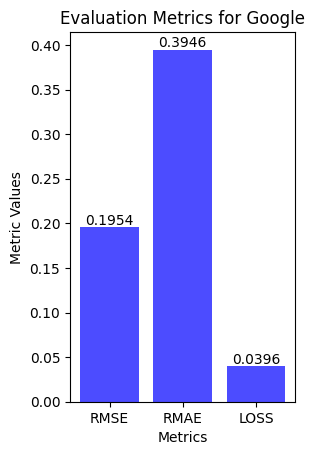

In [41]:
# Plot metrics for Google
plt.subplot(1, 2, 1)
bars = plt.bar(metrics, model1_values, color='b', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Metric Values')
plt.title('Evaluation Metrics for Google')
for bar, value in zip(bars, model1_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom')



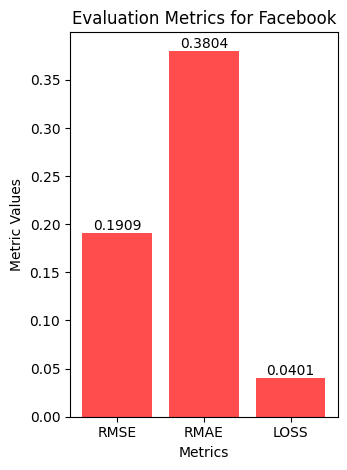

In [42]:
# Plot metrics for Facebook
plt.subplot(1, 2, 2)
bars = plt.bar(metrics, model2_values, color='r', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Metric Values')
plt.title('Evaluation Metrics for Facebook')
for bar, value in zip(bars, model2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

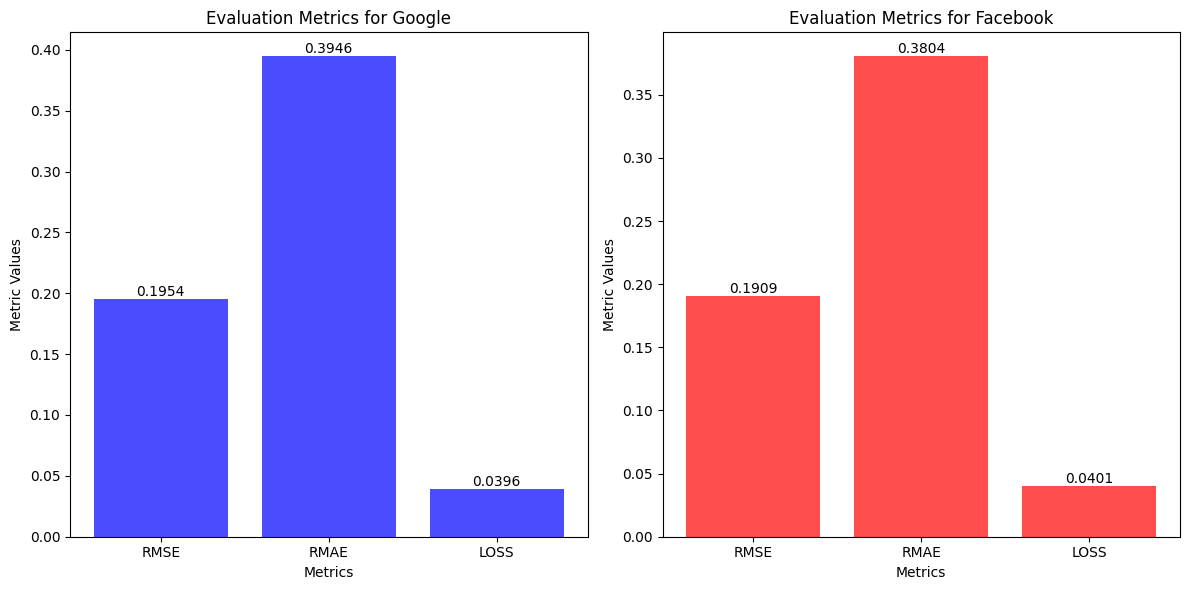

In [43]:
# =========================
# 15. Saving and Evaluating the Model Performance
# =========================
"""
This section saves the test data for later use and compares the
performance of the Google and Facebook models based on RMSE, RMAE,
and loss values.
"""

# Save test_X data for Facebook as a pickle file
with open('facebook_X_test.pkl', 'wb') as file:
    pickle.dump(test_X, file)

# Define model performance metrics for Google and Facebook
Google_metrics = {
    'RMSE': 0.1954,
    'RMAE': 0.3946,
    'LOSS': 0.0396
}
Facebook_metrics = {
    'RMSE': 0.1909,
    'RMAE': 0.3804,
    'LOSS': 0.0401
}

# Extract metric names and values
metrics = list(Google_metrics.keys())
google_values = list(Google_metrics.values())
facebook_values = list(Facebook_metrics.values())

# Plotting the evaluation metrics comparison
plt.figure(figsize=(12, 6))

# Plot Google metrics
plt.subplot(1, 2, 1)
bars = plt.bar(metrics, google_values, color='b', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Metric Values')
plt.title('Evaluation Metrics for Google')
for bar, value in zip(bars, google_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom')

# Plot Facebook metrics
plt.subplot(1, 2, 2)
bars = plt.bar(metrics, facebook_values, color='r', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Metric Values')
plt.title('Evaluation Metrics for Facebook')
for bar, value in zip(bars, facebook_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()
